PROYECTO PRACTICO

In [367]:
#Importar librerias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [368]:
#Carga del Data Set
df_car=pd.read_csv("car_evaluation.csv", header=None)
df_car

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


EXPLORACIÓN DE DATOS

In [369]:
#Visualizar el dataframe
df_car.head(5)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [370]:
#Tamaño del dataframe
print(df_car.shape)

(1728, 7)


In [371]:
#Asignamos nombres a las columnas
col_names=["buying","maint","doors","persons","lug_boot","safety","class"]
df_car.columns=col_names
df_car.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [372]:
#Visualizar tipos de datos
df_car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

Hay 7 variables en el conjunto de datos, todas las variables son tipo de datos categoricos
Las variables: compra, mantenimiento, puertas, personas, lug_boot, seguridad y clase
La clase es la variable target

In [373]:
#Detalle de la varible target
df_car["class"].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [374]:
#Ver si hay valores null
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

PROCESAMIENTO DE DATOS

In [375]:
#Separacion de X y Y
X=df_car.drop(["class"], axis=1) #Borra la variable target y deja las demas
Y=df_car["class"] #Se asigna class a Y


In [376]:
#importamos librerias para la creacion de modelos
from sklearn.model_selection import train_test_split

#30% de los datos es para el test y 70% para train

X_train, X_test, Y_train , Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [377]:
#Verifiquemos que tenemos 
X_train.shape, X_test.shape


((1209, 6), (519, 6))

In [378]:
#Detalle 
X_train.head(5)

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [379]:
Y_train.shape, Y_test.shape

((1209,), (519,))

In [380]:
#Detalle 
Y_train.head(5)

1178    vgood
585     unacc
1552      acc
1169    unacc
1033    unacc
Name: class, dtype: object

In [381]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

ENTRENAMIENTO DEL ARBOL DE DECISIÓN

In [382]:
#Tranformamos de categoricos a numericos los datos de X

import category_encoders as ce

encoder= ce.OrdinalEncoder(cols=["buying", "maint", "doors", "persons", "lug_boot", "safety"])

X_train=encoder.fit_transform(X_train)
X_test=encoder.fit_transform(X_test)


/home/dparedes/.local/lib/python3.10/site-packages/category_encoders/utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
/home/dparedes/.local/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/home/dparedes/.local/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
/home/dparedes/.local/lib/python3.10/site-packages/category_encoders/utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

In [383]:
#Verificamos la tranformacion a numericos

X_train.head(5)


,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [384]:
#Importar librerias de arbol de decisión

from sklearn.tree import DecisionTreeClassifier

In [385]:
#Creación del modelo
tree=DecisionTreeClassifier(max_depth=2, random_state=0)

In [386]:
#Entrenamiento
tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [387]:
#Calculo de las predicciones
Y_train_pred_tree= tree.predict(X_train)
Y_test_pred_tree= tree.predict(X_test)

EVALUACIÓN DEL MODELO DE CLASIFICACIÓN

In [388]:
#Calculo de metricas
from sklearn.metrics import accuracy_score

#Calculo del accuracy en Train
train_accuracy_tree=accuracy_score(Y_train,Y_train_pred_tree)

#Calculo del accuracy en test
test_accuracy_tree=accuracy_score(Y_test,Y_test_pred_tree)

print("El accuracy en train es: ", train_accuracy_tree*100)
print("El accuracy en test es: ", test_accuracy_tree*100)

#Lo idela es tener valores entre 80 y 90


El accuracy en train es:  77.33664185277088
El accuracy en test es:  62.6204238921002


/home/dparedes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dparedes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dparedes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dparedes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

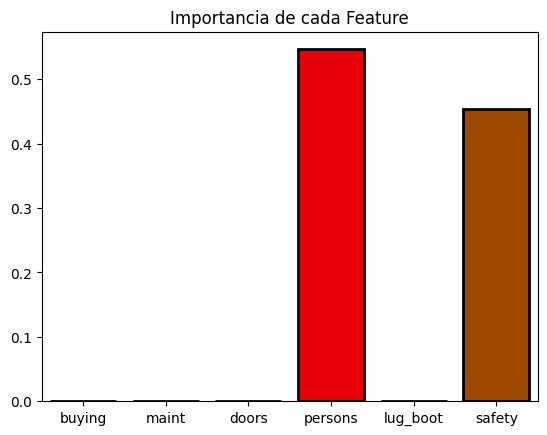

In [389]:
#Verificamos el feature importances

importances = tree.feature_importances_
columns=X.columns
data=pd.DataFrame([importances], columns=columns)
sns.barplot(data, palette = 'bright', saturation = 2.0, edgecolor = 'black', linewidth = 2)
plt.title('Importancia de cada Feature')
plt.show()

## ENTRENAMIENTO DE MODELO DE CLASIFICACIÓN CON RANDOM FOREST

In [390]:
#Importamos random forest
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [391]:
#Calculo de las predicciones
Y_train_pred_rf=rf.predict(X_train)
Y_test_pred_rf=rf.predict(X_test)

## EVALUACION DE LOS RESULATDOS

In [392]:
#Calculo de metricas
from sklearn.metrics import accuracy_score
#Calculo el accuracy en Train
train_accuracy_rf=accuracy_score(Y_train, Y_train_pred_rf)
#Calculo en accuracy en Test
test_accuracy_rf=accuracy_score(Y_test, Y_test_pred_rf)
#Imprimos resultados
print("El accuracy en train es de: ", train_accuracy_rf)
print("El accuracy en test es de: ", test_accuracy_rf)


El accuracy en train es de:  0.9942100909842845
El accuracy en test es de:  0.5202312138728323


In [393]:
#Verificamos el feature importances
features_scores=pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
features_scores

safety      0.254441
buying      0.226386
persons     0.212589
maint       0.140068
lug_boot    0.090112
doors       0.076404
dtype: float64

/home/dparedes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dparedes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dparedes/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


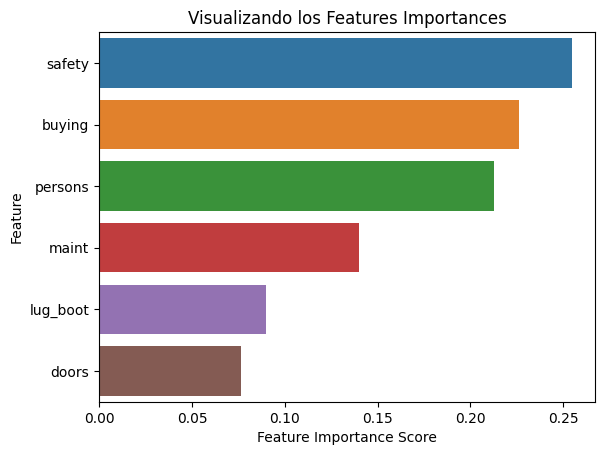

In [395]:
sns.barplot(x=features_scores, y=features_scores.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Visualizando los Features Importances")
plt.show()